# Exercise 3: Siamese networks and zero-shot learning

## Angus Munro

### Introduction

A Siamese network was trained to encode plankton images into 64-dimensional vectors, i.e. as a vector space embedding. The training data comprised approximately 220000 monochromatic images from 27 classes (species). The validation and test data each comprised 2700 images (100 from each category). The code and model was based on the provided repository at https://github.com/ketil-malde/plankton-siamese; this was not modified extensively, instead, the assignment focussed mainly on the interpretation and visualisation of the resulting encoded species "clusters".

### Model and data

The model comprised an `Inception V3` base network, global average pooling, a dropout layer, followed by a dense output layer of 64 units with sigmoid activation. 

The raw images were resized to 299x299 resolution, and were passed to the model, which pasted them onto a 3-channel 299x299 white template, with the monochromatic pixels constituting channel 0. Thus, the two other channels remained unused on the input side but were required due to the architecture of `Inception V3`. 

### Training the model

The model was trained using a triplet loss function, whereby three images (a random anchor, a random positive of the same class, and a random negative of a different class) were input separately to the base network, and the model trained towards a low loss, i.e. outputs  similar for the anchor and positive, and different for the anchor and negative, as quantified by the 2-norm of output vector difference.

Curriculum learning was attempted, where the validation accuracy by class was used to alter the probabilities in the triplet generator toward difficult classes, but this was found to be unwieldy and of little benefit, so the approach was abandoned. 

Transfer learning was used with `imagenet` weights. The default code's model was fully trainable and this was found to be suboptimal at the outset of training with the untrained new model head confounding the pretrained base model. Instead, the Inception base model was frozen for the first 5 epochs to pre-train the model head, after which the base model was unlocked (at a lower learning rate) to continue training the full model. Training was conducted stepwise in steps of 5 epochs; between each step, various information was logged and the learning rate was reduced by 10%. Additionally the model was saved at each step, enabling the resumption of training for model 'nursing'. An `Adam` optimiser was used, and a learning rate of 1E-3 for the head training and 1E-5 for the full training were found to be appropriate. 

The standard triplet loss was observed to fall to around 0.2 after 10 cycles each of 5 epochs, where each epoch comprised 600 batches of 20 triplets (12000 triplets per epoch). 

The script `train.py` performed the training, using parameters contained in `config.py`, and the output of the training epochs is reproduced below (though the training was not done in Jupyter Notebook):

Epoch 1/5
600/600 [==============================] - 639s 1s/step - loss: 1.2891 - val_loss: 0.9695

Epoch 2/5
600/600 [==============================] - 574s 956ms/step - loss: 1.0145 - val_loss: 0.8825

Epoch 3/5
600/600 [==============================] - 574s 956ms/step - loss: 0.9749 - val_loss: 0.8263

Epoch 4/5
600/600 [==============================] - 575s 958ms/step - loss: 0.8633 - val_loss: 0.7616

Epoch 5/5
600/600 [==============================] - 574s 956ms/step - loss: 0.8224 - val_loss: 0.6671

Epoch 1/5
600/600 [==============================] - 575s 958ms/step - loss: 0.7824 - val_loss: 0.7063

Epoch 2/5
600/600 [==============================] - 575s 959ms/step - loss: 0.6954 - val_loss: 0.6225

Epoch 3/5
600/600 [==============================] - 575s 959ms/step - loss: 0.7260 - val_loss: 0.5778

Epoch 4/5
600/600 [==============================] - 575s 958ms/step - loss: 0.6634 - val_loss: 0.5825

Epoch 5/5
600/600 [==============================] - 574s 957ms/step - loss: 0.6325 - val_loss: 0.4933

Epoch 1/5
600/600 [==============================] - 575s 958ms/step - loss: 0.6089 - val_loss: 0.5784

Epoch 2/5
600/600 [==============================] - 574s 957ms/step - loss: 0.5513 - val_loss: 0.4322

Epoch 3/5
600/600 [==============================] - 574s 957ms/step - loss: 0.5685 - val_loss: 0.5239

Epoch 4/5
600/600 [==============================] - 574s 956ms/step - loss: 0.5499 - val_loss: 0.4774

Epoch 5/5
600/600 [==============================] - 575s 958ms/step - loss: 0.5299 - val_loss: 0.4233

Epoch 1/5
600/600 [==============================] - 574s 957ms/step - loss: 0.5105 - val_loss: 0.3972

Epoch 2/5
600/600 [==============================] - 573s 955ms/step - loss: 0.4738 - val_loss: 0.3855

Epoch 3/5
600/600 [==============================] - 574s 957ms/step - loss: 0.4902 - val_loss: 0.4417

Epoch 4/5
600/600 [==============================] - 575s 958ms/step - loss: 0.4592 - val_loss: 0.4689

Epoch 5/5
600/600 [==============================] - 576s 960ms/step - loss: 0.4526 - val_loss: 0.5247

Epoch 1/5
600/600 [==============================] - 574s 957ms/step - loss: 0.4414 - val_loss: 0.3077

Epoch 2/5
600/600 [==============================] - 574s 957ms/step - loss: 0.4243 - val_loss: 0.3328

Epoch 3/5
600/600 [==============================] - 574s 957ms/step - loss: 0.3814 - val_loss: 0.4663

Epoch 4/5
600/600 [==============================] - 574s 957ms/step - loss: 0.4005 - val_loss: 0.4510

Epoch 5/5
600/600 [==============================] - 574s 957ms/step - loss: 0.4041 - val_loss: 0.3711

Epoch 1/5
600/600 [==============================] - 574s 957ms/step - loss: 0.3945 - val_loss: 0.3418

Epoch 2/5
600/600 [==============================] - 575s 959ms/step - loss: 0.3603 - val_loss: 0.3398

Epoch 3/5
600/600 [==============================] - 574s 957ms/step - loss: 0.3428 - val_loss: 0.3252

Epoch 4/5
600/600 [==============================] - 574s 957ms/step - loss: 0.3696 - val_loss: 0.3065

Epoch 5/5
600/600 [==============================] - 575s 958ms/step - loss: 0.3653 - val_loss: 0.3227

Epoch 1/5
600/600 [==============================] - 575s 959ms/step - loss: 0.3522 - val_loss: 0.3545

Epoch 2/5
600/600 [==============================] - 574s 957ms/step - loss: 0.3164 - val_loss: 0.3058

Epoch 3/5
600/600 [==============================] - 576s 960ms/step - loss: 0.3117 - val_loss: 0.3013

Epoch 4/5
600/600 [==============================] - 574s 957ms/step - loss: 0.3425 - val_loss: 0.2539

Epoch 5/5
600/600 [==============================] - 575s 958ms/step - loss: 0.3341 - val_loss: 0.2749

Epoch 1/5
600/600 [==============================] - 574s 956ms/step - loss: 0.3324 - val_loss: 0.3018

Epoch 2/5
600/600 [==============================] - 575s 958ms/step - loss: 0.3168 - val_loss: 0.3463

Epoch 3/5
600/600 [==============================] - 575s 958ms/step - loss: 0.3015 - val_loss: 0.2841

Epoch 4/5
600/600 [==============================] - 575s 959ms/step - loss: 0.3117 - val_loss: 0.3029

Epoch 5/5
600/600 [==============================] - 575s 958ms/step - loss: 0.3140 - val_loss: 0.2510

Epoch 1/5
600/600 [==============================] - 575s 958ms/step - loss: 0.3078 - val_loss: 0.2591

Epoch 2/5
600/600 [==============================] - 574s 956ms/step - loss: 0.2894 - val_loss: 0.2666

Epoch 3/5
600/600 [==============================] - 574s 957ms/step - loss: 0.2734 - val_loss: 0.2700

Epoch 4/5
600/600 [==============================] - 576s 959ms/step - loss: 0.2937 - val_loss: 0.3135

Epoch 5/5
600/600 [==============================] - 574s 957ms/step - loss: 0.2777 - val_loss: 0.2941

Epoch 1/5
600/600 [==============================] - 575s 959ms/step - loss: 0.2790 - val_loss: 0.2878

Epoch 2/5
600/600 [==============================] - 575s 959ms/step - loss: 0.2745 - val_loss: 0.2990

Epoch 3/5
600/600 [==============================] - 574s 957ms/step - loss: 0.2797 - val_loss: 0.2620

Epoch 4/5
600/600 [==============================] - 574s 957ms/step - loss: 0.2695 - val_loss: 0.2488

Epoch 5/5
600/600 [==============================] - 576s 960ms/step - loss: 0.2426 - val_loss: 0.2037

Epoch 1/5
600/600 [==============================] - 779s 1s/step - loss: 0.2478 - val_loss: 0.1980

Epoch 2/5
600/600 [==============================] - 589s 982ms/step - loss: 0.2450 - val_loss: 0.2522

Epoch 3/5
600/600 [==============================] - 574s 957ms/step - loss: 0.2356 - val_loss: 0.2577

Epoch 4/5
600/600 [==============================] - 574s 957ms/step - loss: 0.2456 - val_loss: 0.2477

Epoch 5/5
600/600 [==============================] - 578s 963ms/step - loss: 0.2415 - val_loss: 0.2736

Epoch 1/5
600/600 [==============================] - 575s 958ms/step - loss: 0.2433 - val_loss: 0.2036

Epoch 2/5
600/600 [==============================] - 574s 957ms/step - loss: 0.2288 - val_loss: 0.2292

Epoch 3/5
600/600 [==============================] - 575s 958ms/step - loss: 0.2159 - val_loss: 0.2521

Epoch 4/5
600/600 [==============================] - 576s 959ms/step - loss: 0.2317 - val_loss: 0.2343

Epoch 5/5
600/600 [==============================] - 574s 957ms/step - loss: 0.2388 - val_loss: 0.1916

Epoch 1/5
600/600 [==============================] - 624s 1s/step - loss: 0.2263 - val_loss: 0.2118

Epoch 2/5
600/600 [==============================] - 558s 930ms/step - loss: 0.2193 - val_loss: 0.2108

Epoch 3/5
600/600 [==============================] - 557s 928ms/step - loss: 0.2266 - val_loss: 0.2231

Epoch 4/5
600/600 [==============================] - 557s 928ms/step - loss: 0.2170 - val_loss: 0.2135

Epoch 5/5
600/600 [==============================] - 556s 927ms/step - loss: 0.2312 - val_loss: 0.2145

Epoch 1/5
600/600 [==============================] - 558s 930ms/step - loss: 0.2035 - val_loss: 0.2030

Epoch 2/5
600/600 [==============================] - 557s 928ms/step - loss: 0.2083 - val_loss: 0.2300

Epoch 3/5
600/600 [==============================] - 557s 928ms/step - loss: 0.2348 - val_loss: 0.1749

Epoch 4/5
600/600 [==============================] - 557s 928ms/step - loss: 0.2146 - val_loss: 0.1976

Epoch 5/5
600/600 [==============================] - 557s 928ms/step - loss: 0.2085 - val_loss: 0.1693

Epoch 1/5
600/600 [==============================] - 558s 930ms/step - loss: 0.2239 - val_loss: 0.1396

Epoch 2/5
600/600 [==============================] - 557s 928ms/step - loss: 0.2206 - val_loss: 0.1950

Epoch 3/5
600/600 [==============================] - 558s 930ms/step - loss: 0.2151 - val_loss: 0.2062

Epoch 4/5
600/600 [==============================] - 557s 929ms/step - loss: 0.2013 - val_loss: 0.2059

Epoch 5/5
600/600 [==============================] - 561s 935ms/step - loss: 0.2067 - val_loss: 0.1923

Epoch 1/5
600/600 [==============================] - 557s 929ms/step - loss: 0.1940 - val_loss: 0.2288

Epoch 2/5
600/600 [==============================] - 558s 929ms/step - loss: 0.2086 - val_loss: 0.2193

Epoch 3/5
600/600 [==============================] - 557s 929ms/step - loss: 0.2094 - val_loss: 0.2042

Epoch 4/5
600/600 [==============================] - 557s 929ms/step - loss: 0.2100 - val_loss: 0.2729

Epoch 5/5
600/600 [==============================] - 558s 930ms/step - loss: 0.2148 - val_loss: 0.2038

Epoch 1/5
600/600 [==============================] - 557s 929ms/step - loss: 0.1864 - val_loss: 0.2114

Epoch 2/5
600/600 [==============================] - 558s 929ms/step - loss: 0.2131 - val_loss: 0.2111

Epoch 3/5
600/600 [==============================] - 557s 929ms/step - loss: 0.2028 - val_loss: 0.2116

Epoch 4/5
600/600 [==============================] - 557s 928ms/step - loss: 0.1929 - val_loss: 0.2130

Epoch 5/5
600/600 [==============================] - 558s 930ms/step - loss: 0.1964 - val_loss: 0.1801

Epoch 1/5
600/600 [==============================] - 558s 929ms/step - loss: 0.2144 - val_loss: 0.2266

Epoch 2/5
600/600 [==============================] - 558s 930ms/step - loss: 0.1977 - val_loss: 0.2184

Epoch 3/5
600/600 [==============================] - 557s 928ms/step - loss: 0.2096 - val_loss: 0.1743

Epoch 4/5
600/600 [==============================] - 557s 929ms/step - loss: 0.2089 - val_loss: 0.1960

Epoch 5/5
600/600 [==============================] - 558s 930ms/step - loss: 0.2101 - val_loss: 0.1778

Epoch 1/5
600/600 [==============================] - 558s 930ms/step - loss: 0.2122 - val_loss: 0.2009

Epoch 2/5
600/600 [==============================] - 557s 929ms/step - loss: 0.2034 - val_loss: 0.1952

Epoch 3/5
600/600 [==============================] - 558s 929ms/step - loss: 0.1994 - val_loss: 0.1882

Epoch 4/5
600/600 [==============================] - 557s 929ms/step - loss: 0.2030 - val_loss: 0.2423

Epoch 5/5
600/600 [==============================] - 558s 930ms/step - loss: 0.2082 - val_loss: 0.2097

A plot of the progression of training and validation loss is shown below:

In [1]:
%pwd

'C:\\Dropbox\\UiB\\INF368_SelTopicsMachineLearning\\projects\\ex3\\INF368-Ex3\\notebooks'

In [2]:
%cd ..

C:\Dropbox\UiB\INF368_SelTopicsMachineLearning\projects\ex3\INF368-Ex3


In [ ]:
%matplotlib notebook
import viz as v

Using TensorFlow backend.


<IPython.core.display.Javascript object>


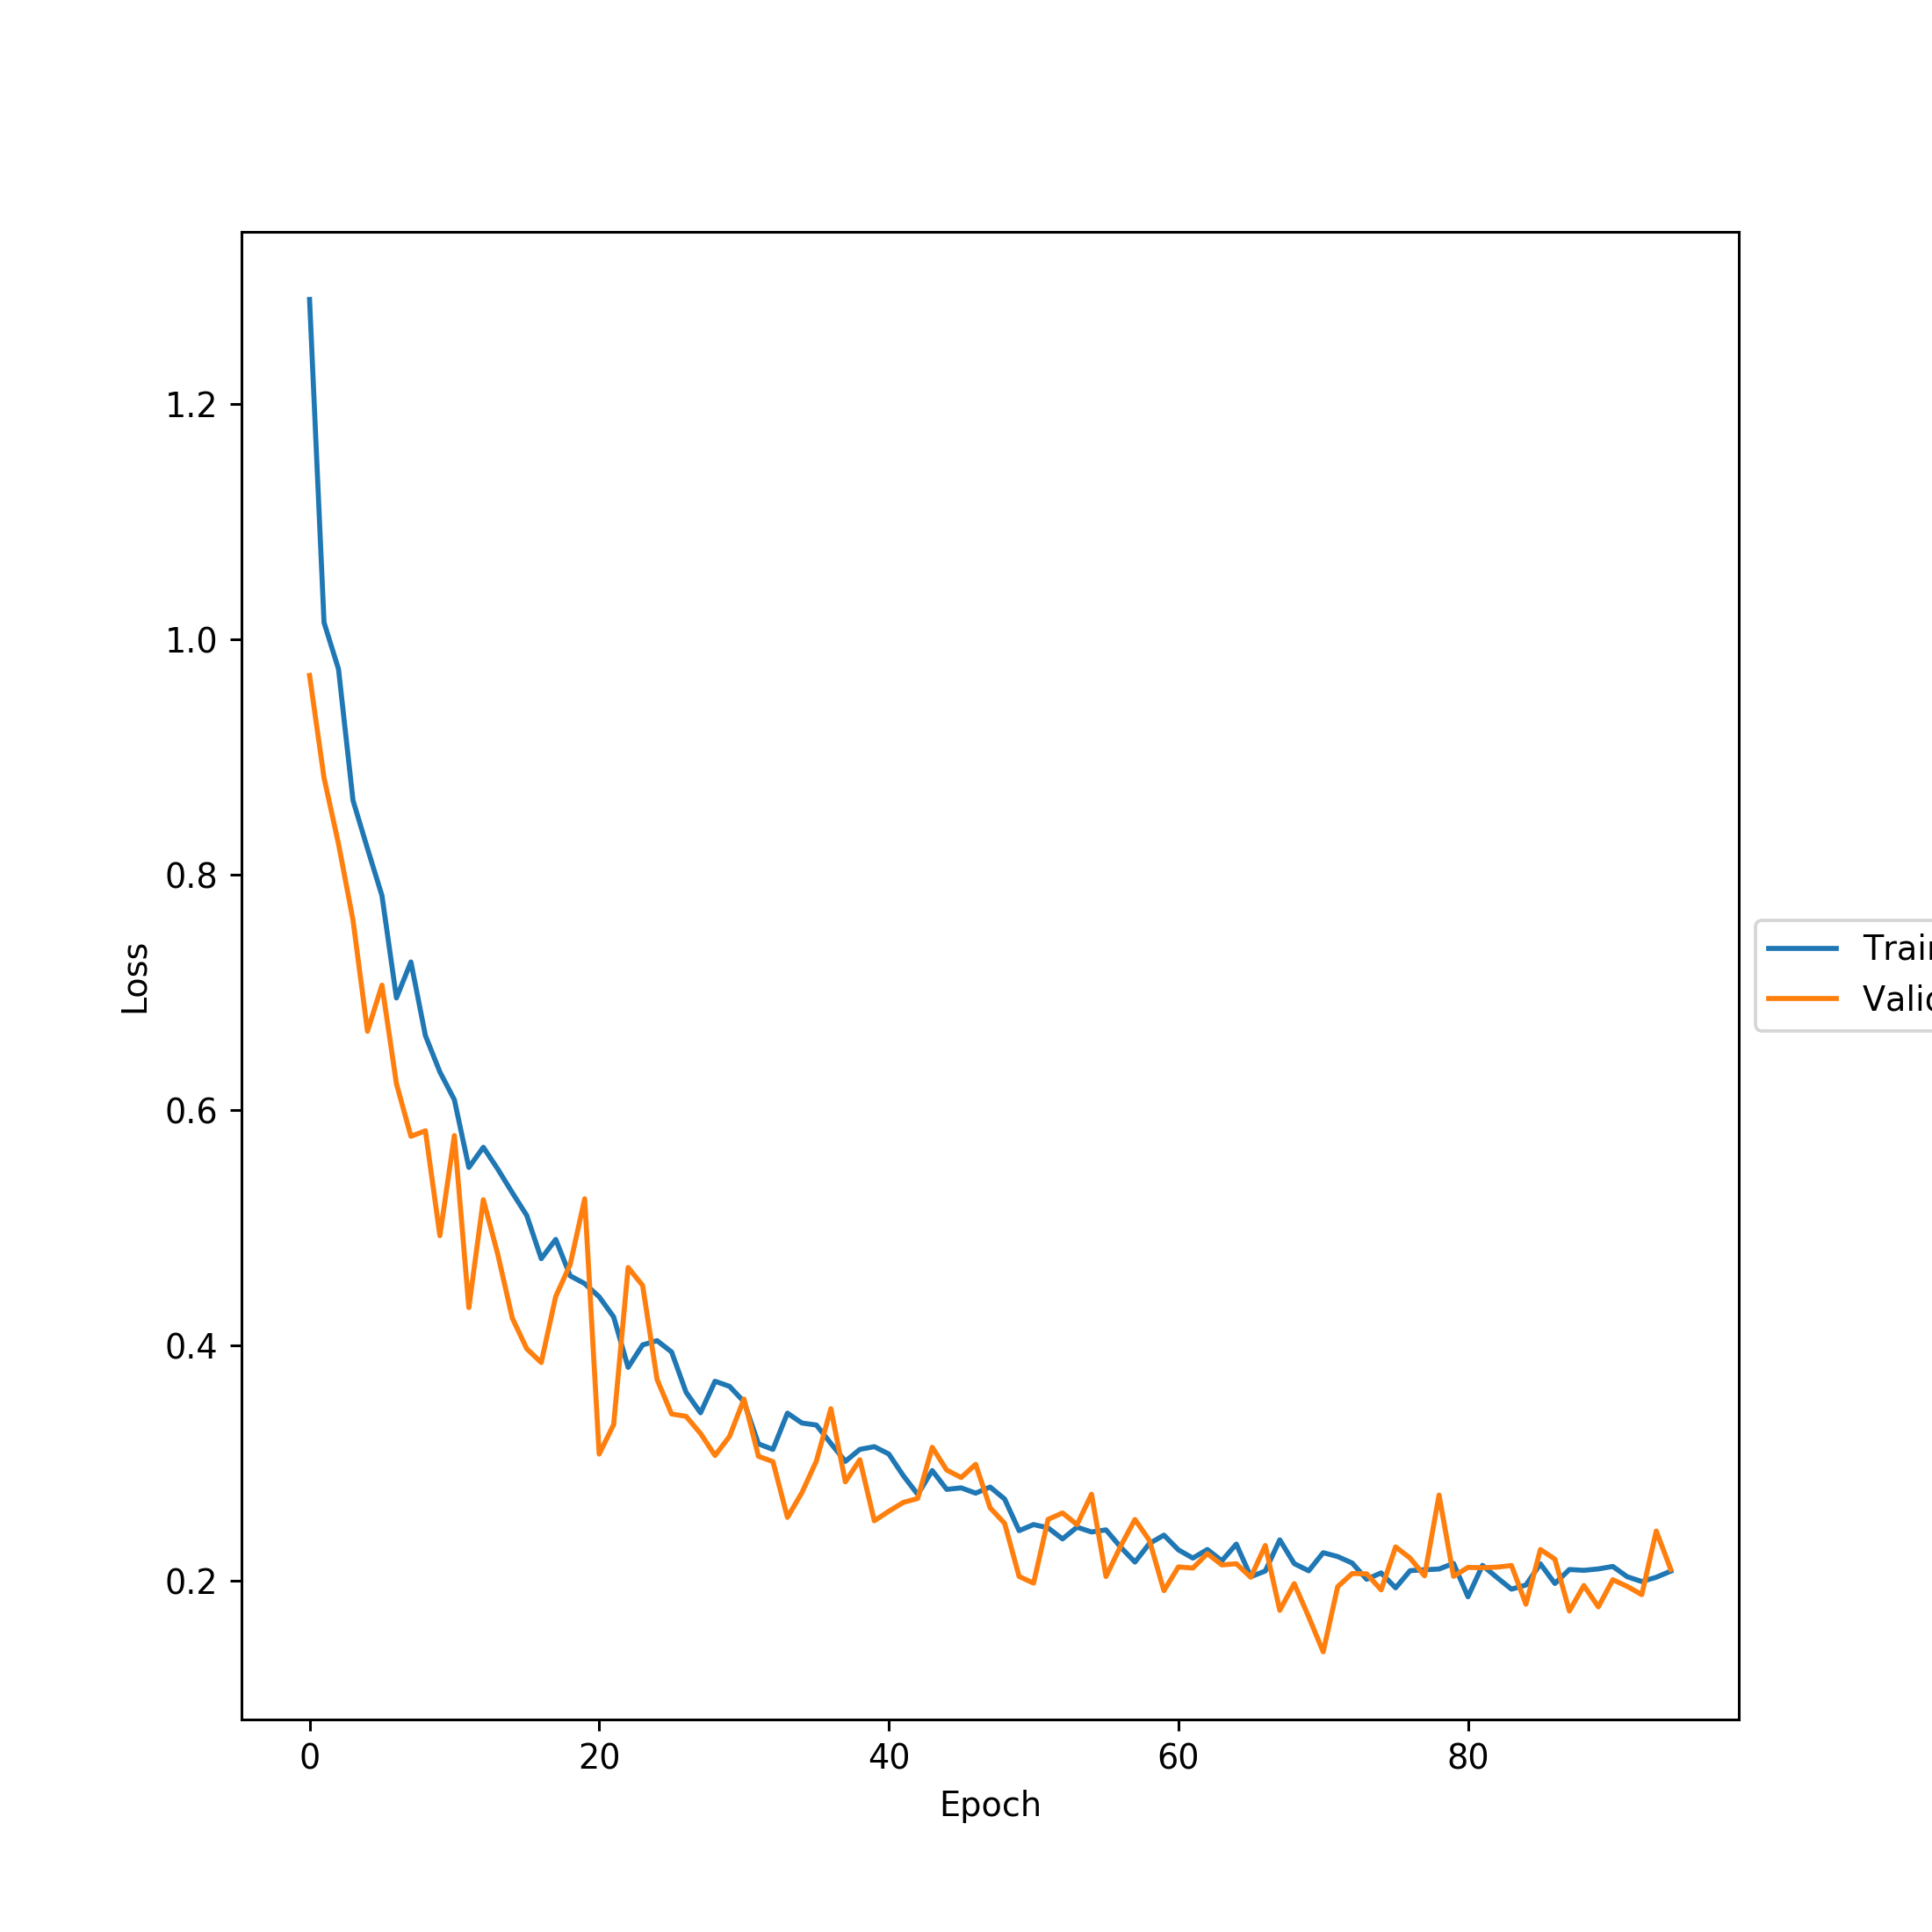

In [15]:
_ = v.plot_epoch_losses()

A plot of the average cluster radius compared to the average cluster separation is shown below. (observations...)

<IPython.core.display.Javascript object>


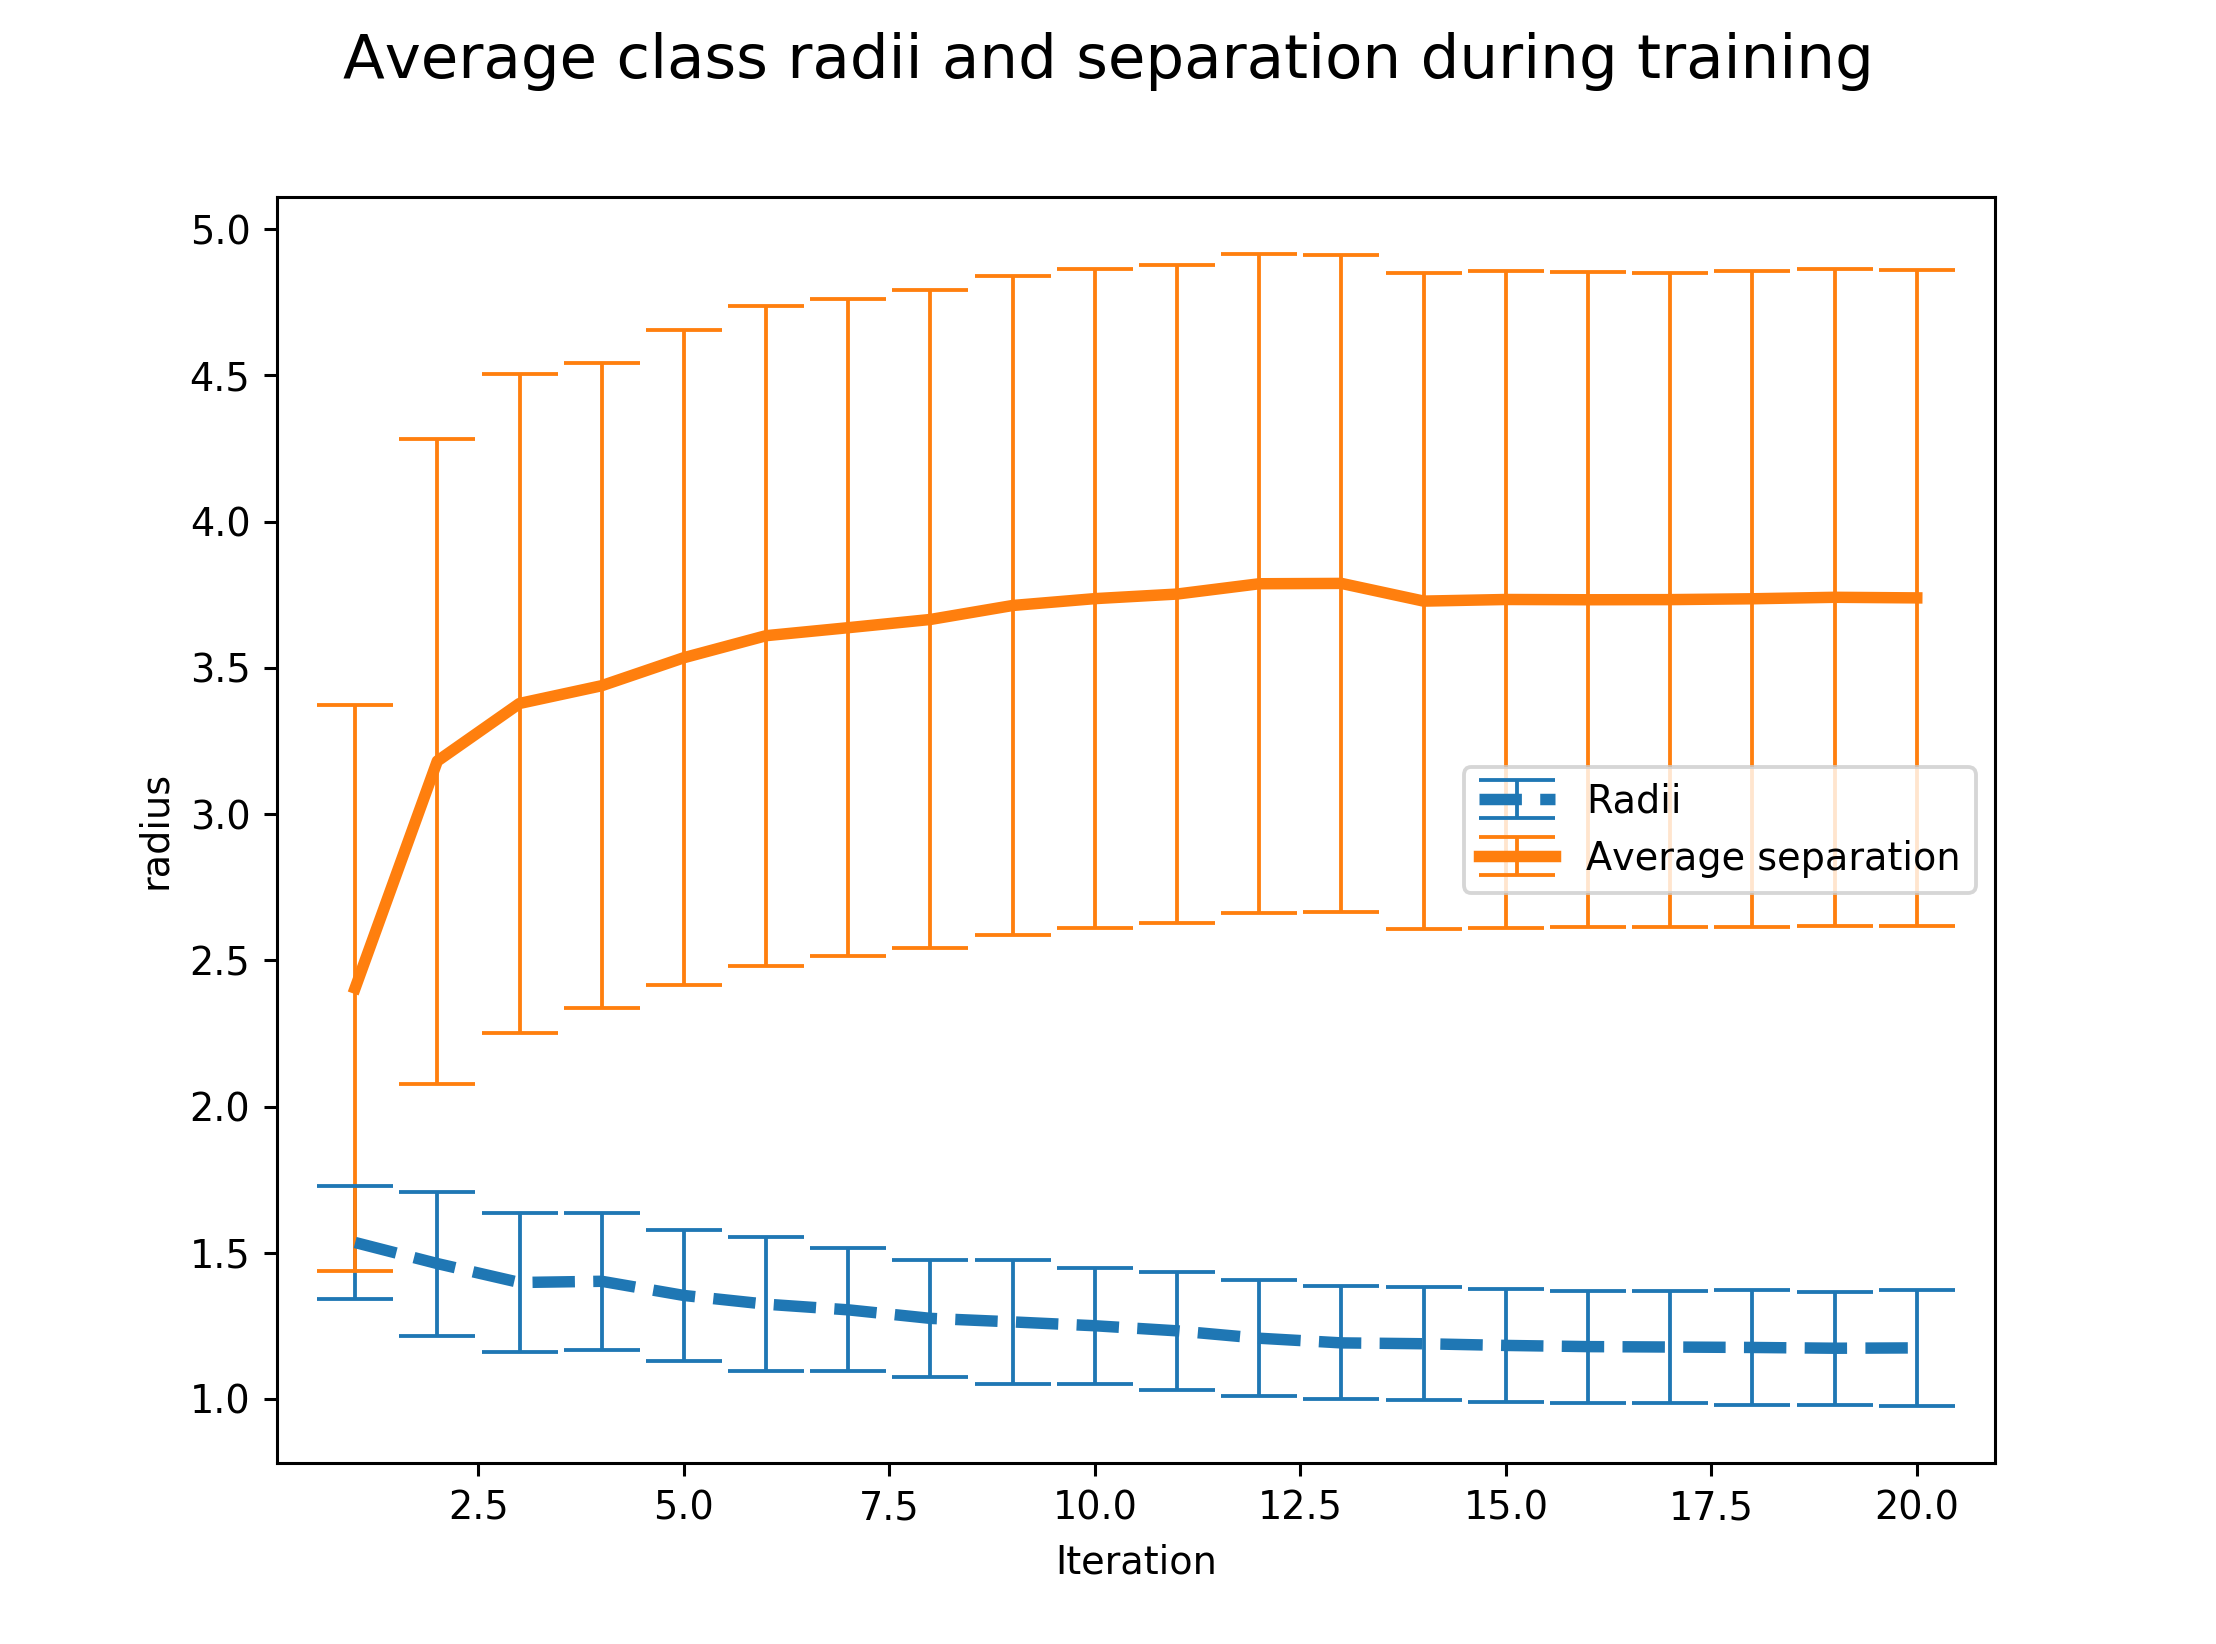

In [18]:
import config as C
_ = v.plot_train_radii_separation(C.obj_dir)

## Visualize the embedding

The trained embedder was investigated using several means. Firstly, a confusion plot demonstrates the class for which it performs well, and those which it confuses. Secondly, PCA was applied to elucidate the components which explain the most variance in the embedding, and the embedded validation data clusters were visualised using `ployly` with a 3D plot of the leading 3 dimensions, including an animation over the course of training. 

Below is a confusion plot of the model's classifications, where the classification for each embedding is simply the closest class centroid:

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML

In [ ]:
clusters = v.read_clusters()
i = 19 #which model to use
cmat, classes = v.confusion_matrix(clusters, i-1)
_ = v.plot_confusion_matrix(cmat,
                          classes,
                          title='Confusion matrix for {}th iteration'.format(i),
                          cmap=None,
                          normalize=True)

In [ ]:
from IPython.display import HTML
HTML("""
<video width="640" height="480" controls>
  <source src="images/conf_anim.avi" type="video/avi">
</video>
""")

In [ ]:
%pwd

In [1]:
%cd /home/angus_munro/projects/ex3/INF368-Ex3

from keras.models import load_model
from keras.callbacks import CSVLogger
from keras.optimizers import SGD, Adam

import os

from create_model import create_base_network, in_dim, tripletize, std_triplet_loss, alt_triplet_loss
from generators import triplet_generator
import testing as T

import config as C

last = C.last

[WinError 3] The system cannot find the path specified: '/home/angus_munro/projects/ex3/INF368-Ex3'
C:\Dropbox\UiB\INF368_SelTopicsMachineLearning\projects\ex3\INF368-Ex3\notebooks


Using TensorFlow backend.


ModuleNotFoundError: No module named 'create_model'

It was found that the default base model, which was fully trainable, led to validation loss remaining maxed out at 5.0 during training, at least for 50 epochs. Training loss decreased in a reasonable way. It is likely that the weights in the Inception body were thrown off by the influence of the new last layer weights. To remedy this, weights of the new layer alone were first trained:

In [4]:
from am_plankton import set_trainable_layers

In [5]:
base_model = create_base_network(in_dim)

In [6]:
set_trainable_layers(base_model, 1)
model = tripletize(base_model)
#model.compile(optimizer=SGD(lr=C.learn_rate, momentum=0.9),
#             loss=std_triplet_loss())
model.compile(optimizer=Adam(),
             loss=alt_triplet_loss())

def avg(x):
    return sum(x)/len(x)


Setting top 1 layers of base model trainable
